<sup>6</sup>He(α,α) Simulation Update
=====================
September 8, 2016
--------------------

In [1]:
import ROOT
from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
import rootprint
import rootnotes
import utils
from IPython.display import Image

# GEANT4 Progress #

* Last time, we still had some issues with vertexPosition, and cmEnergy.
* Last time, events were taking place AFTER the lollipop and Silicons.
    * Few key changes have been made to fix these issues.
* There are some new issues that came up that need to be addressed.


# A whole new world # 
Not Aladdin...

* Previously, the whole world was filled with the gas.
* Now, a new world of Vacuum has been created and the gas world is housed in the vacuumWorld.
    * I then adjusted the distances, etc accordingly.

* Scintillator and Havar are outside the gas worlds.
* Further, conditions are placed that reactions can ONLY take place in the gasWorld.
* Lollipop is ofcourse excluded as before.

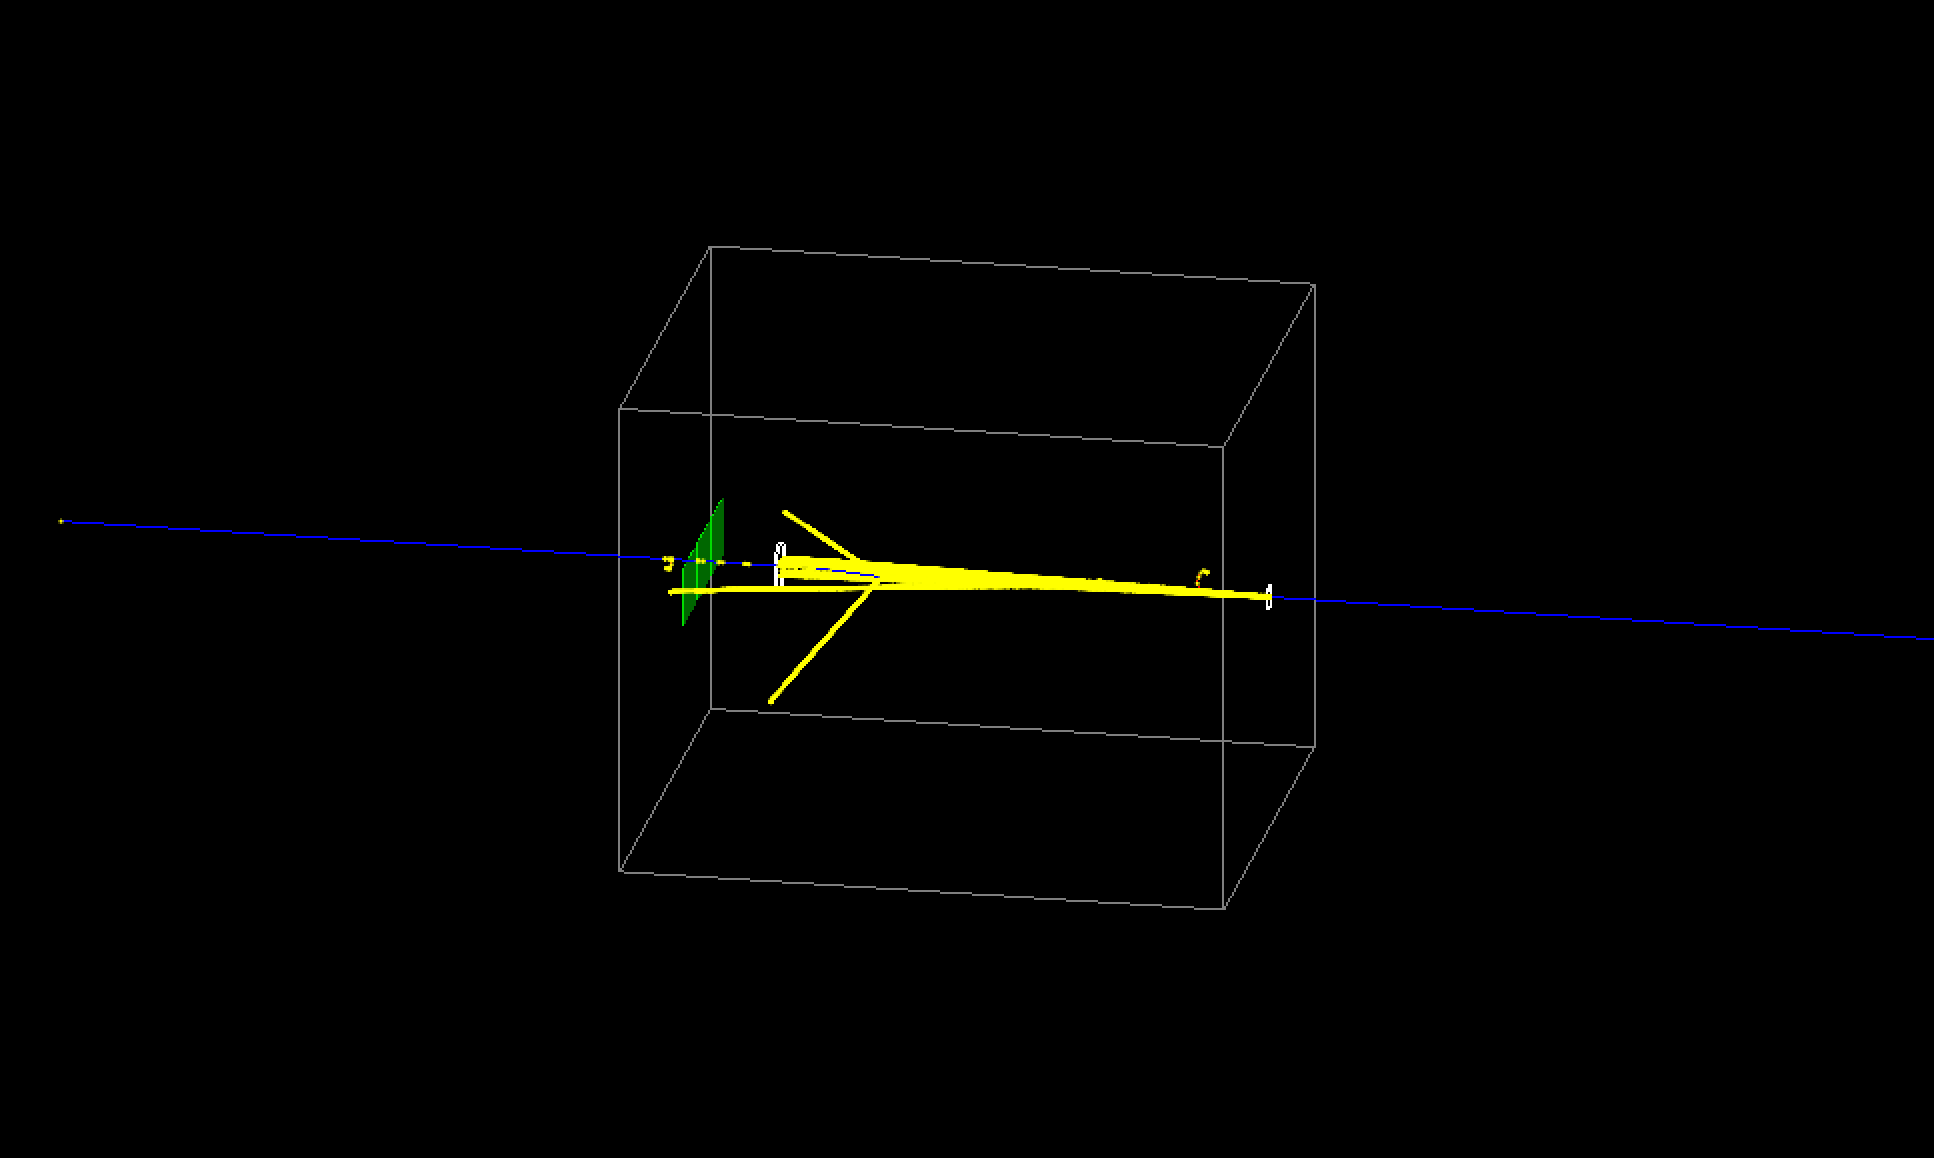

In [2]:
Image(filename="/home/sriteja/box.com/GR_Group (kold3d@gmail.com)/GroupMeetingTalks/images/20160908_SimVisualWorld.png")

In [3]:
ROOT.gROOT.Reset()
#Clear all stored canvases/variables

In [4]:
#input all the files
inputFile_allAlphas = TFile("~/Desktop/rootFiles/he_sim_vacuumWorld.root")
inputFile_recoilAlphas = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldRecoilHe.root")
inputFile_decayAlphas = TFile("~/Desktop/rootFiles/he_sim_vacuumWorldDecayHe.root")

In [5]:
#Read in and store all the simData trees into callable functions
allAlphas = inputFile_allAlphas.Get("simData")
recoilAlphas = inputFile_recoilAlphas.Get("simData")
decayAlphas = inputFile_decayAlphas.Get("simData")

# All the $\alpha$ s #
### The cmEnergy has been restricted to 10MeV at the upper end to try and prevent the spike of reactions happening at z=0 ###

In [6]:
%%rootprint
c1 = rootnotes.canvas("allAlphas", (696*2,472))
c1.Divide(2)
c1.cd(1)
allAlphas.Draw("siEnergy", "siHitMass==4")
c1.cd(2)
allAlphas.Draw("siHitMass")

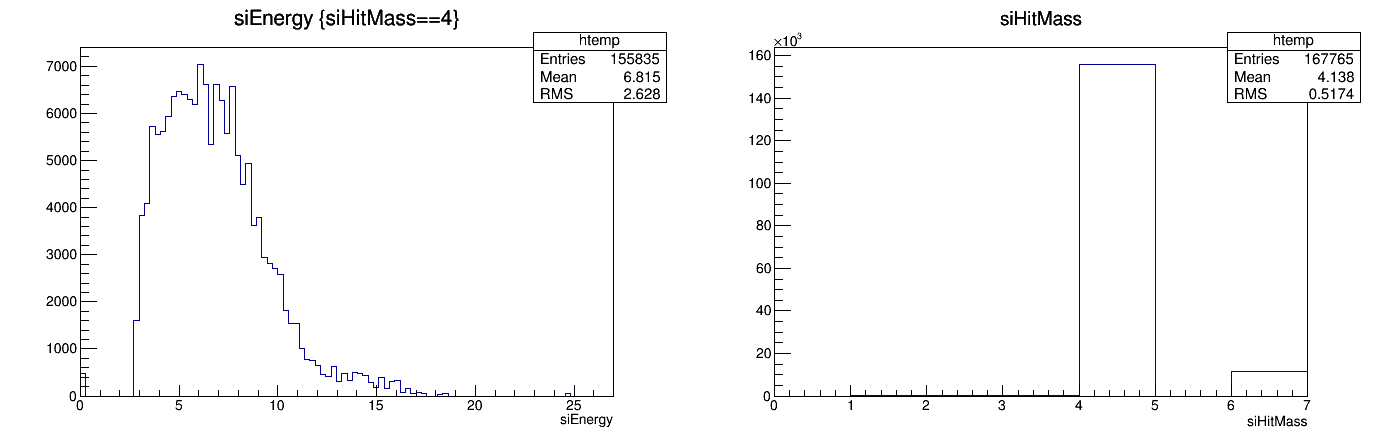

In [7]:
c1

In [8]:
%%rootprint
c12 = rootnotes.canvas('allAlphasCMenergy',(696,472))
allAlphas.Draw("cmEnergy")

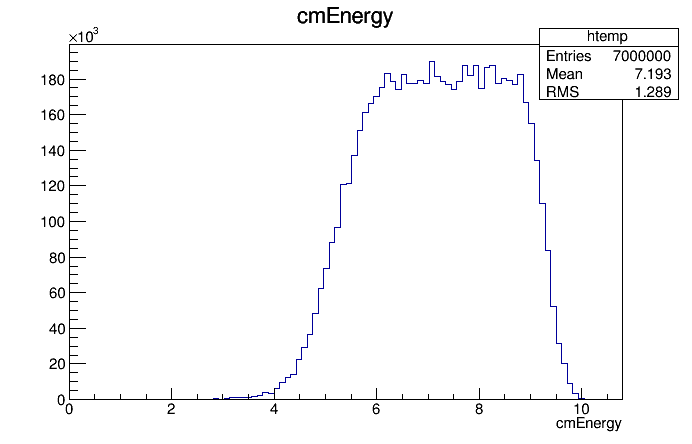

In [9]:
c12

# Recoil $\alpha$ s #

In [10]:
%%rootprint
c2 = rootnotes.canvas("recoilAlphas", (696*2,472))
c2.Divide(2)
c2.cd(1)
recoilAlphas.Draw("siEnergy", "siHitMass==4")
c2.cd(2)
recoilAlphas.Draw("siHitMass")

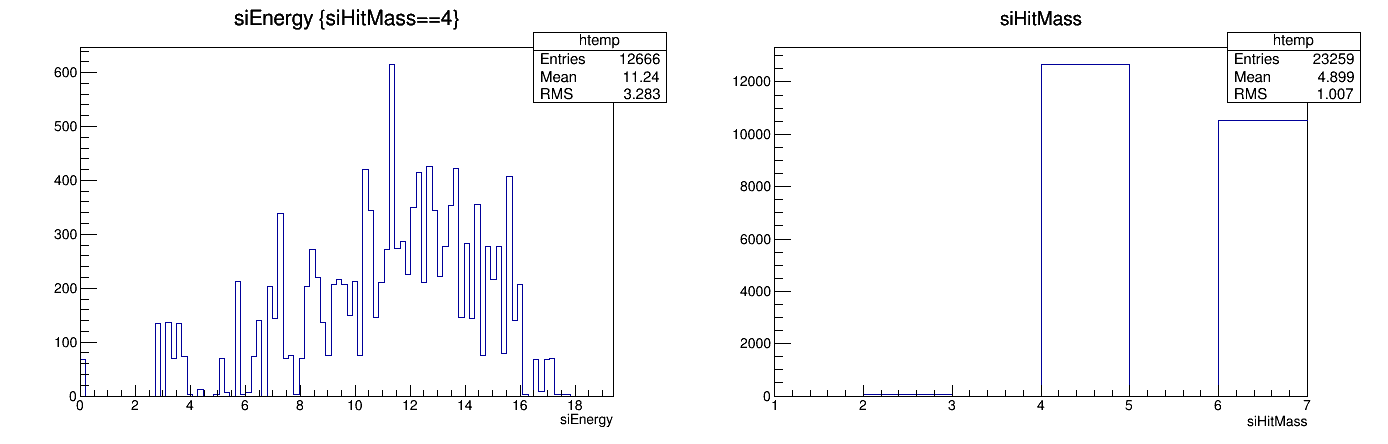

In [11]:
c2

<ul>
<li>We see a lot of <sup>6</sup>He here...</li>
</ul>

# Decay $\alpha$ s #

In [12]:
%%rootprint
c3 = rootnotes.canvas("decayAlphas", (696*2,472))
c3.Divide(2)
c3.cd(1)
decayAlphas.Draw("siEnergy", "siHitMass==4")
c3.cd(2)
decayAlphas.Draw("siHitMass" )

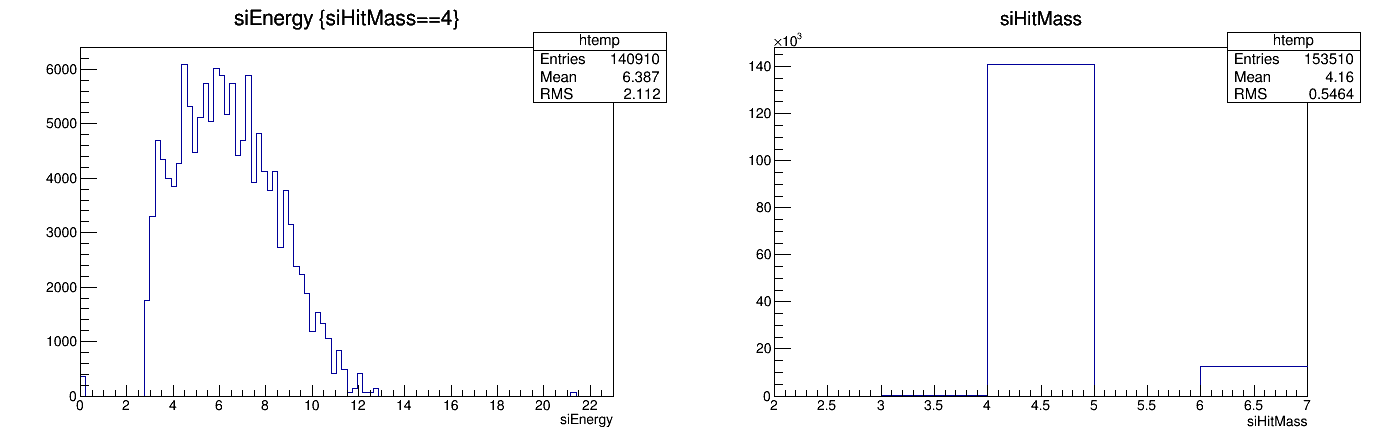

In [13]:
c3


* We see a lot of <sup>6</sup>He decay into&nbsp;&alpha;...
* My&nbsp;code is set to decay for every single scattering event.
* I&nbsp;always create the 6He with an excitation energy of 1.8 (I don't think this is correct?)

```cpp
fExEnergy = fQValue*MeV;

if(particleTable->GetIonTable()->FindIon(fHeavyProductCharge,fHeavyProductMass,fExEnergy)) 
    heavy = particleTable->GetIonTable()->FindIon(fHeavyProductCharge,fHeavyProductMass,fExEnergy);
else heavy = particleTable->GetIonTable()->GetIon(fHeavyProductCharge,fHeavyProductMass,fExEnergy);
```
* We always make <sup>6</sup>He particle with 1.8MeV excitation energy, which will always decay

# All $\alpha$s again #

In [14]:
%%rootprint
c4 = rootnotes.canvas("allAlphas_cmE", (696*2,472*2))
c4.Divide(2,2)
c4.cd(1)
allAlphas.Draw("cmEnergy")
c4.cd(2)
allAlphas.Draw("vertexPosition[2]")
c4.cd(3)
allAlphas.Draw("vertexPosition[2]:cmEnergy","","colz")
c4.cd(4)
allAlphas.Draw("siEnergy:cmEnergy","siHitMass==4","colz")

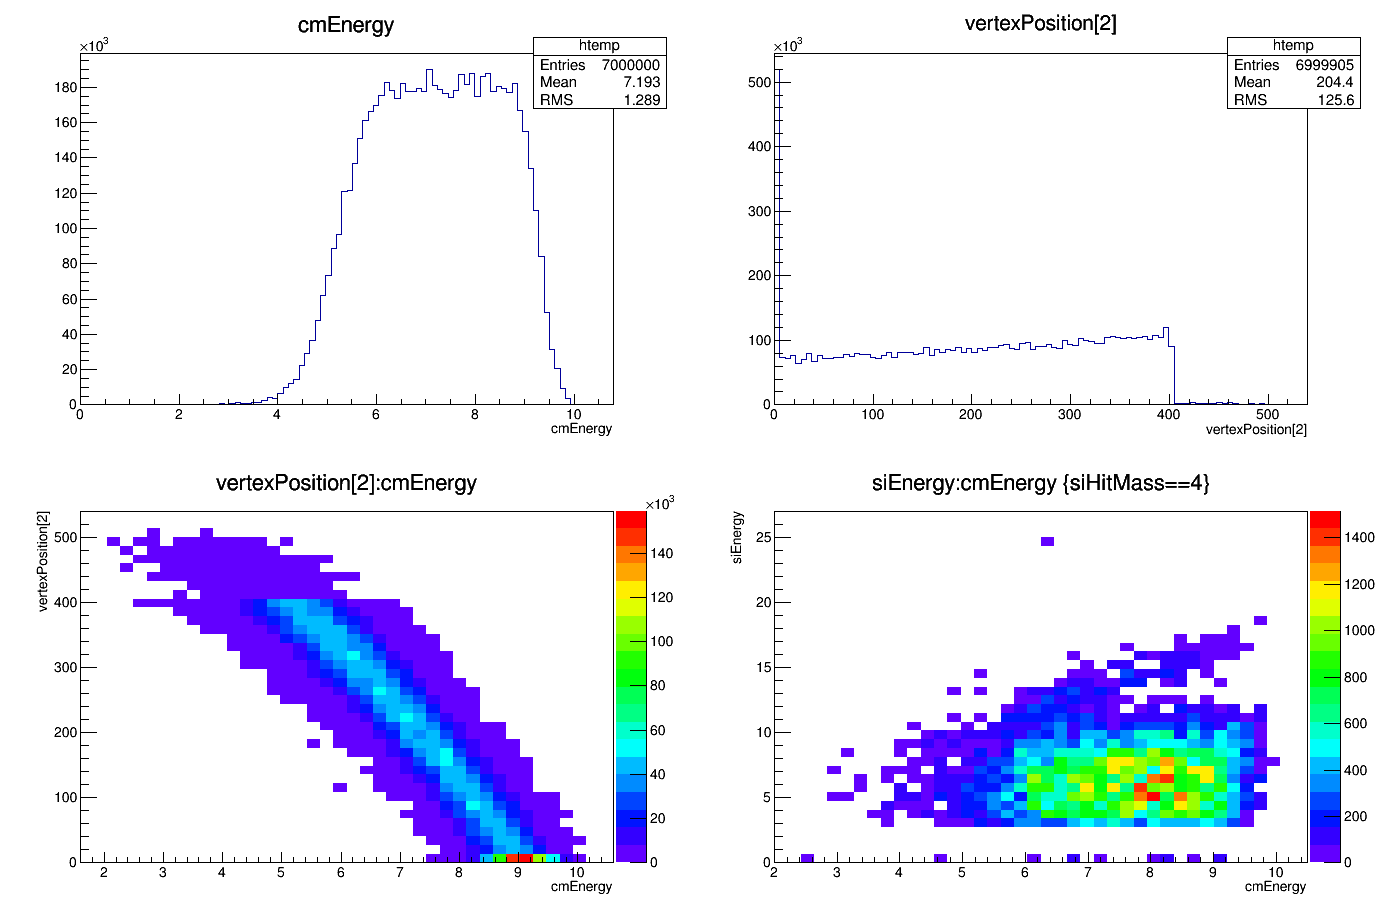

In [15]:
c4

* We can see again, that the cmEnergy is cut off at 10MeV. This doesn't fully solve the issue with the events happening at $z=0$, however, it is reduced greatly.
    * Not sure if this is the right approach
    * Still unable to fully eliminate the peak at $z=0$
* The cmEnergy vs. vertexPosition[2] plot seems reasonable for the most part. There is a good distribution, as we'd expect. The lollipop, which is at $z=405$mm seems to be effective in stopoping the reactions
* I don't fully understand the cmEnergy vs labEnergy (siEnergy). We'll look at it further below...

# Recoil $\alpha$s again #

In [16]:
%%rootprint
c5 = rootnotes.canvas("recoilAlphas_cmE", (696*2,472*2))
c5.Divide(2,2)
c5.cd(1)
recoilAlphas.Draw("cmEnergy")
c5.cd(2)
recoilAlphas.Draw("vertexPosition[2]")
c5.cd(3)
recoilAlphas.Draw("vertexPosition[2]:cmEnergy","","colz")
c5.cd(4)
recoilAlphas.Draw("siEnergy:cmEnergy","siHitMass==4","colz")

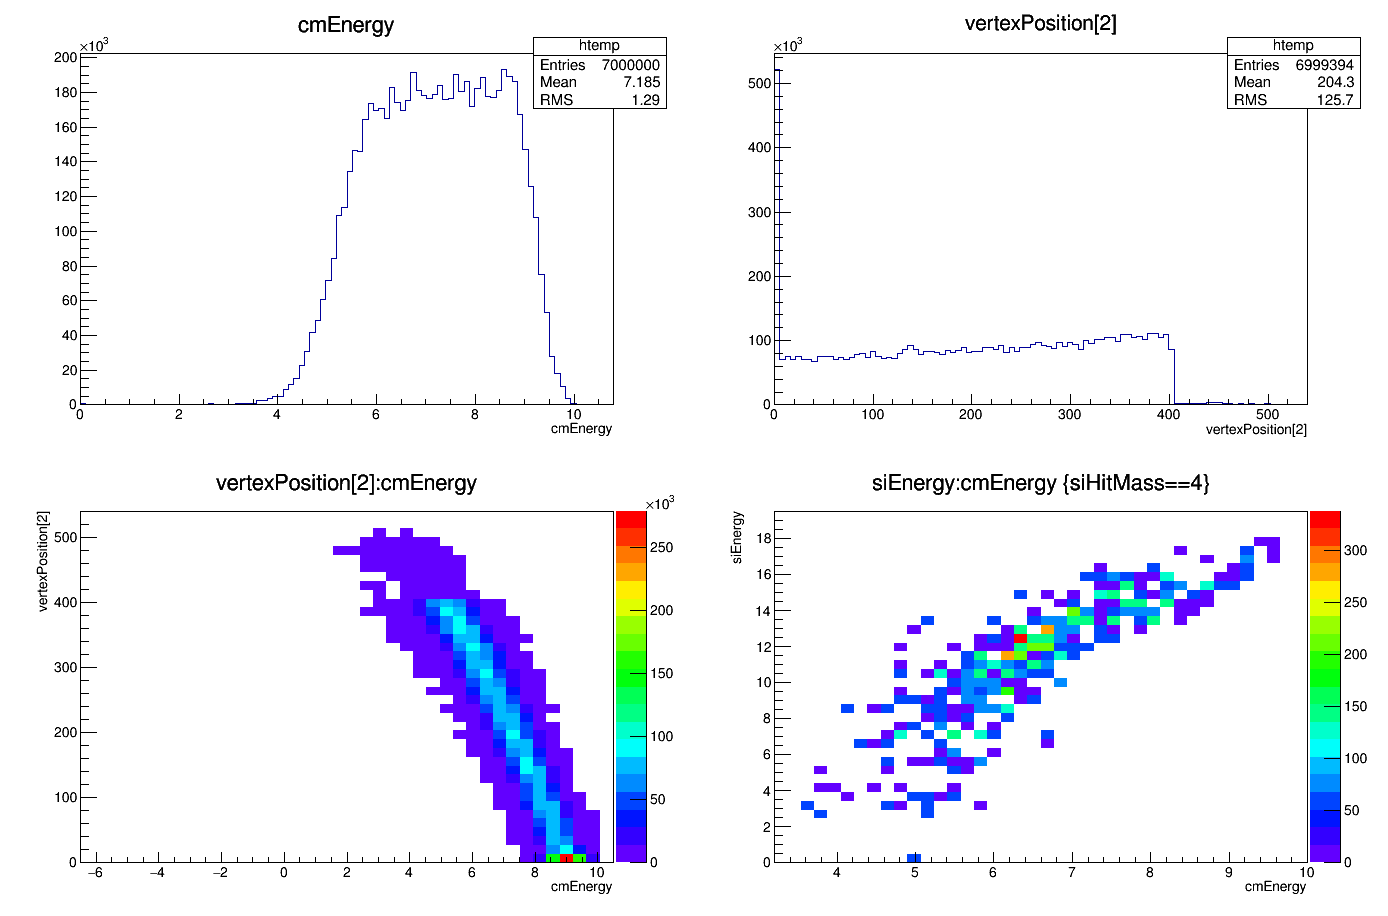

In [17]:
c5

* The cmEnergy vs. vertexPosition[2] plot seems reasonable again
* cmEnergy vs labEnergy (siEnergy): seems like what we should expect?
    * There should be a linear (more or less) relationship, which we can see there is here.

# Decay $\alpha$s again #

In [18]:
%%rootprint
c6 = rootnotes.canvas("recoilAlphas_cmE", (696*2,472*2))
c6.Divide(2,2)
c6.cd(1)
decayAlphas.Draw("cmEnergy")
c6.cd(2)
decayAlphas.Draw("vertexPosition[2]")
c6.cd(3)
decayAlphas.Draw("vertexPosition[2]:cmEnergy","","colz")
c6.cd(4)
decayAlphas.Draw("siEnergy:cmEnergy","siHitMass==4","colz")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: recoilAlphas_cmE


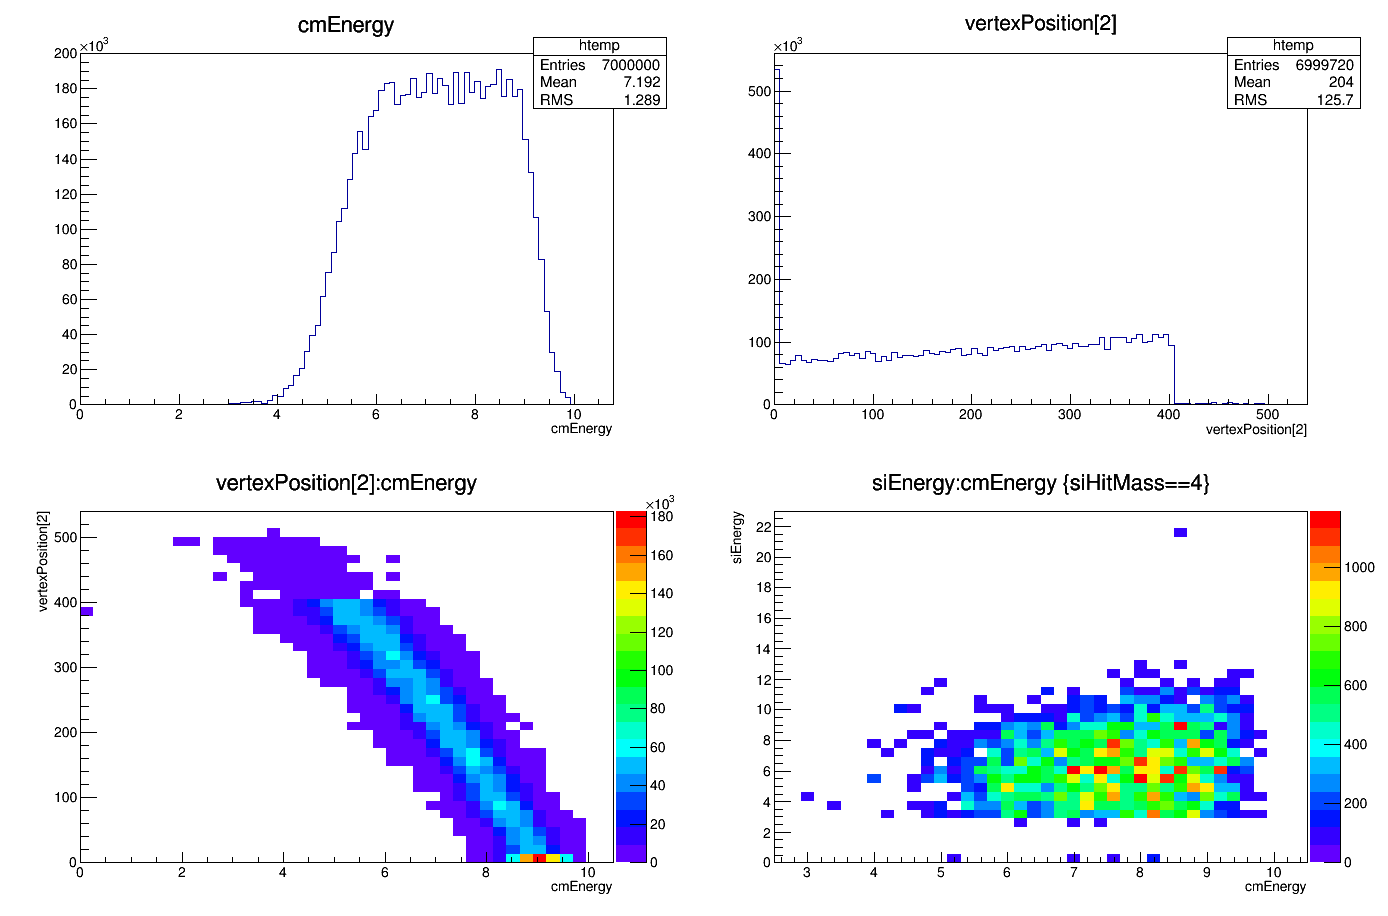

In [19]:
c6

* cmEnergy and vertexPosition both seem reasonable (except for the spile at $z=0$ that was mentioned earlier.).
* I do not understand what is going ono herer with the cmEnergy vs. siEnergy... the linear trend that I expected is not there.

## There is another bug I recently discovered thatI am working on fixing ##

#### The events we see in the detectors are not balanced. What I expect is detectors 1 and 3 to have high but similar number of events, and detector 2 (which is blocked by the lollipop) to have a lot less events. ####

In [20]:
%%rootprint
c7 = rootnotes.canvas("recoilAlphas_si", (696*2,472*2))
c7.Divide(2,2)
c7.cd(1)
allAlphas.Draw("siDetector")
c7.cd(2)
recoilAlphas.Draw("siDetector")
c7.cd(3)
decayAlphas.Draw("siDetector")

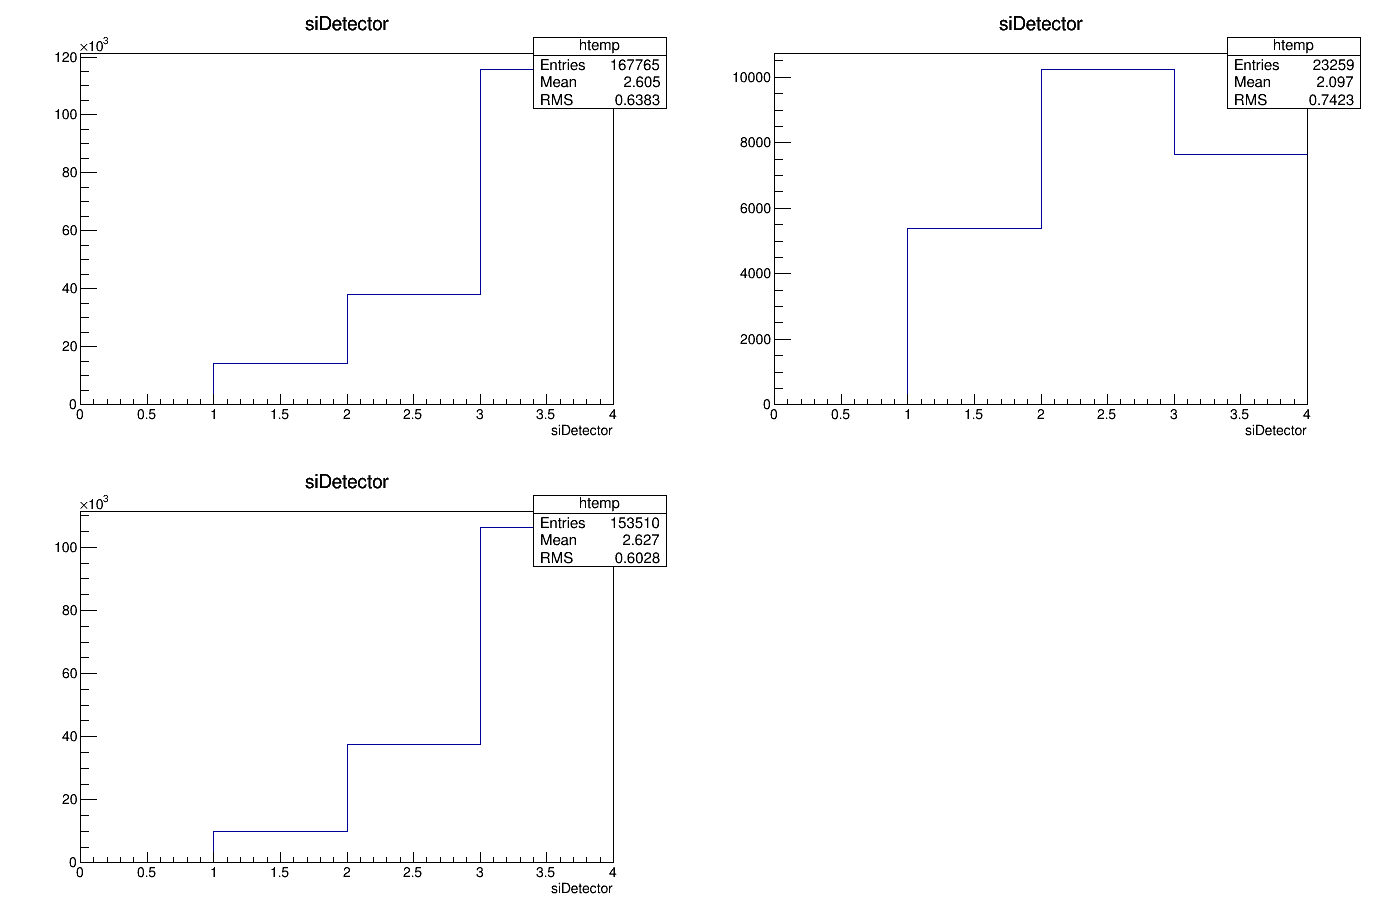

In [21]:
c7

#### There are a bunch of variations I saw here. I am still trying to track down where this issue is coming from. ####
#### I have reverted back to a state of my repository from two weeks ago and am going through a couple of files that I modified to see if I can isolate what is causing this problem. ####
###### This can also be seen visually (as we can see below)... the events seem to be heavily biased towards one of the detectors ######

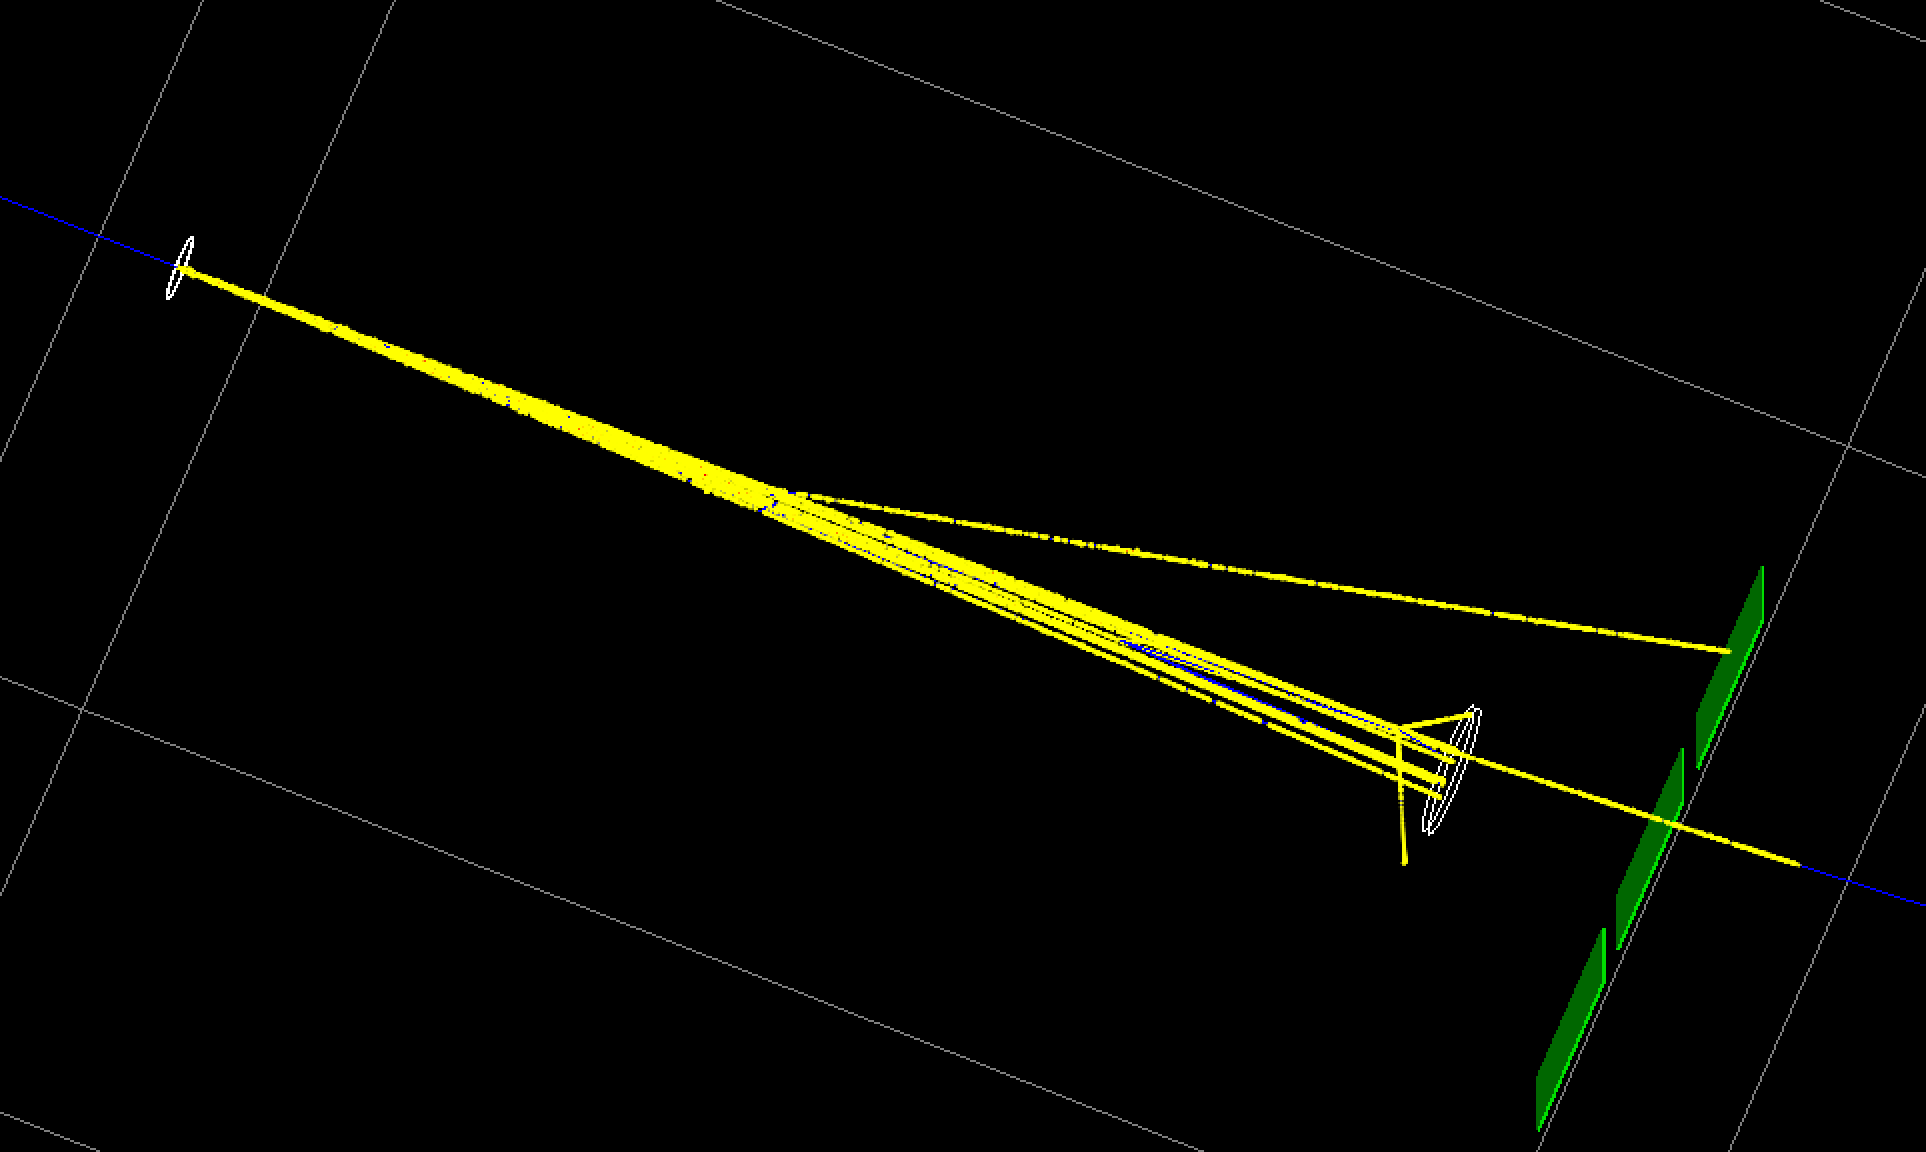

In [22]:
Image(filename="/home/sriteja/box.com/GR_Group (kold3d@gmail.com)/GroupMeetingTalks/images/20160908_SimVisualTracks.png")

To Do:
====
* Fix the issue with <sup>6</sup>He decay? (where it is always excited and decays)
    * #### How can we implement 6He without always having the same excitation energy? ####
* Fix the issue with the detector bias.
    * checked out a version of this that worked from my git repository. Ran a  ``` git diff``` to see what the differences are between my current version and that. I am going through the differences right now to see if I can identify the issue.